In [ ]:
import os
from sklearn.svm import SVC
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
os.listdir('/content/drive/MyDrive/ML-Jan/Data (1)')

['Cat', 'Dog']

In [ ]:
len(os.listdir('/content/drive/MyDrive/ML-Jan/Data (1)/Dog'))

66

In [ ]:
dirpath='/content/drive/MyDrive/ML-Jan/Data (1)'
contents=os.listdir(dirpath)
for i in contents:
  newpath=os.path.join(dirpath,i)
  print(newpath)
  images=os.listdir(newpath)
  for img in images:
     img_path=os.path.join(newpath,img)
     print(img_path)

/content/drive/MyDrive/ML-Jan/Data (1)/Cat
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.11.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.10.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.1 - Copy.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.2 - Copy.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.18.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.21.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.12.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.14.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.13.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.15.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.16.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.17.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.20.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.31.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.27.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.30.jpg
/content/drive/MyDrive/ML-Jan/Data (1)/Cat/cat.29.jpg
/content/drive/MyDrive/ML-J

In [ ]:
data_arr=[]
target=[]
categories=['Cat','Dog']
dirpath='/content/drive/MyDrive/ML-Jan/Data (1)'

In [ ]:
for i in categories:
  print("Loading.......categories",i)
  newpth=os.path.join(dirpath,i)
  images=os.listdir(newpath)
  for img in images:
    img_path=os.path.join(newpath,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    data_arr.append(img_resized.flatten())
    target.append(categories.index(i))
  print('Loaded category: ',i,"succesfully")

Loading.......categories Cat
Loaded category:  Cat succesfully
Loading.......categories Dog
Loaded category:  Dog succesfully


In [ ]:
df=pd.DataFrame(data_arr)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615648,...,0.154498,0.374932,0.086351,0.136334,0.391043,0.102914,0.152860,0.404771,0.117473,0.167004
1,0.243882,0.256748,0.371104,0.260913,0.266651,0.378362,0.276114,0.273245,0.378138,0.280244,...,0.463472,0.455897,0.385309,0.432369,0.469203,0.398615,0.447326,0.480224,0.409636,0.464329
2,0.328935,0.358005,0.367701,0.326817,0.346671,0.355655,0.370786,0.384492,0.383515,0.384010,...,0.523332,0.398245,0.420038,0.449349,0.446150,0.467290,0.493328,0.532981,0.542810,0.541604
3,0.308329,0.553506,0.777715,0.303431,0.552215,0.777627,0.296074,0.550453,0.779473,0.300729,...,0.069591,0.631062,0.246654,0.090677,0.635869,0.248497,0.094980,0.635869,0.248497,0.094980
4,0.612096,0.506214,0.470920,0.573104,0.467242,0.437046,0.545130,0.447135,0.427854,0.411151,...,0.361344,0.395262,0.348204,0.348235,0.372594,0.325535,0.325567,0.386530,0.339471,0.339503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.540430,0.592002,0.587192,0.536907,0.582837,0.564881,0.473051,0.511448,0.474642,0.414647,...,0.187970,0.070573,0.083511,0.048696,0.227812,0.231461,0.175383,0.065175,0.065175,0.027635
128,0.525404,0.515404,0.385404,0.541982,0.531982,0.401980,0.549706,0.539706,0.408779,0.541766,...,0.327961,0.547997,0.553535,0.311182,0.547216,0.562070,0.275076,0.673287,0.665615,0.441600
129,0.180388,0.305878,0.211760,0.179468,0.304958,0.210840,0.176474,0.301964,0.207846,0.174089,...,0.170797,0.407024,0.567886,0.167792,0.393432,0.571711,0.150718,0.392157,0.572549,0.149020
130,0.265494,0.194915,0.165522,0.289091,0.236930,0.201553,0.297122,0.270173,0.230698,0.270863,...,0.152773,0.311343,0.311343,0.115264,0.383767,0.383767,0.187688,0.405936,0.405936,0.209857


In [ ]:
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615686,0.647059,0.658824,0.615648,...,0.374932,0.086351,0.136334,0.391043,0.102914,0.152860,0.404771,0.117473,0.167004,0
1,0.243882,0.256748,0.371104,0.260913,0.266651,0.378362,0.276114,0.273245,0.378138,0.280244,...,0.455897,0.385309,0.432369,0.469203,0.398615,0.447326,0.480224,0.409636,0.464329,0
2,0.328935,0.358005,0.367701,0.326817,0.346671,0.355655,0.370786,0.384492,0.383515,0.384010,...,0.398245,0.420038,0.449349,0.446150,0.467290,0.493328,0.532981,0.542810,0.541604,0
3,0.308329,0.553506,0.777715,0.303431,0.552215,0.777627,0.296074,0.550453,0.779473,0.300729,...,0.631062,0.246654,0.090677,0.635869,0.248497,0.094980,0.635869,0.248497,0.094980,0
4,0.612096,0.506214,0.470920,0.573104,0.467242,0.437046,0.545130,0.447135,0.427854,0.411151,...,0.395262,0.348204,0.348235,0.372594,0.325535,0.325567,0.386530,0.339471,0.339503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.540430,0.592002,0.587192,0.536907,0.582837,0.564881,0.473051,0.511448,0.474642,0.414647,...,0.070573,0.083511,0.048696,0.227812,0.231461,0.175383,0.065175,0.065175,0.027635,1
128,0.525404,0.515404,0.385404,0.541982,0.531982,0.401980,0.549706,0.539706,0.408779,0.541766,...,0.547997,0.553535,0.311182,0.547216,0.562070,0.275076,0.673287,0.665615,0.441600,1
129,0.180388,0.305878,0.211760,0.179468,0.304958,0.210840,0.176474,0.301964,0.207846,0.174089,...,0.407024,0.567886,0.167792,0.393432,0.571711,0.150718,0.392157,0.572549,0.149020,1
130,0.265494,0.194915,0.165522,0.289091,0.236930,0.201553,0.297122,0.270173,0.230698,0.270863,...,0.311343,0.311343,0.115264,0.383767,0.383767,0.187688,0.405936,0.405936,0.209857,1


In [ ]:
X=np.array(data_arr)
X

array([[0.61568627, 0.64705882, 0.65882353, ..., 0.40477079, 0.11747284,
        0.16700429],
       [0.24388196, 0.25674761, 0.37110391, ..., 0.48022397, 0.40963574,
        0.46432853],
       [0.328935  , 0.35800489, 0.36770109, ..., 0.53298063, 0.54281028,
        0.54160383],
       ...,
       [0.18038763, 0.30587782, 0.21176018, ..., 0.39215686, 0.57254902,
        0.14901961],
       [0.26549381, 0.19491517, 0.16552205, ..., 0.40593565, 0.40593565,
        0.20985722],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
y=np.array(target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.10      0.10        21
           1       0.14      0.16      0.15        19

    accuracy                           0.12        40
   macro avg       0.12      0.13      0.12        40
weighted avg       0.12      0.12      0.12        40



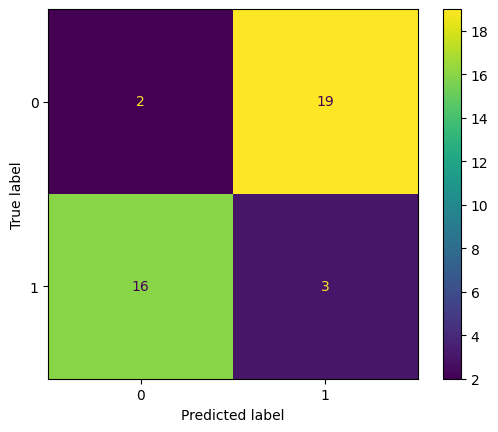

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))